# Taming Text

In this homework we will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy.

In [27]:
#A few dependecies are needed:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the data:

In [2]:
data_dir = 'hillary-clinton-emails/'
filename = 'Emails.csv'
df = pd.read_csv(data_dir + filename)

In [3]:
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...


## Assignment 1 - Word Cloud

In [28]:
from wordcloud import WordCloud
import nltk

### 1.1 First Cloud - WordCloud Library

In [20]:
#Get the row text
text = df.RawText.astype('str').tolist()

In [23]:
text[0]

'UNCLASSIFIED\r\nU.S. Department of State\r\nCase No. F-2015-04841\r\nDoc No. C05739545\r\nDate: 05/13/2015\r\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\r\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.\r\nRELEASE IN FULL\r\nFrom: Sullivan, Jacob J <Sullivan11@state.gov>\r\nSent: Wednesday, September 12, 2012 10:16 AM\r\nTo:\r\nSubject: FW: Wow\r\nFrom: Brose, Christian (Armed Services) (mailto:Christian_Brose@armed-servic,essenate.govi\r\nSent: Wednesday, September 12, 2012 10:09 AM\r\nTo: Sullivan, Jacob J\r\nSubject: Wow\r\nWhat a wonderful, strong and moving statement by your boss. please tell her how much Sen. McCain appreciated it. Me\r\ntoo\r\nUNCLASSIFIED\r\nU.S. Department of State\r\nCase No. F-2015-04841\r\nDoc No. C05739545\r\nDate: 05/13/2015\r\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\r\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045247\r\n\x0c'

In [25]:
#Maybe we wanna do some preprocessing here to get only the body of the email.

#  ??


In [26]:
#Collapse
long_string = ''.join(text)

(-0.5, 399.5, 199.5, -0.5)

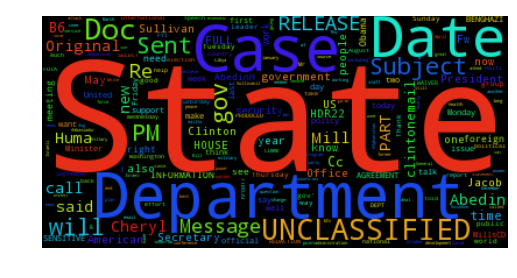

In [22]:
# Generate a word cloud image
wordcloud = WordCloud().generate(long_string)
plt.imshow(wordcloud)
plt.axis("off")

### 1.2 Second Cloud - Pre-processing pipeline & NLTK

In [ ]:
#Donwload nltk if not done yet:
# nltk.download()

In [33]:
#Tokenization
tokens = nltk.word_tokenize(long_string)

In [ ]:
#Stopword removal

In [ ]:
#stemming

## Assignment 2 - Sentiment by Country

First we find all the mentions of world countries in the whole corpus, using the pycountry utility. Next we perform sentiment analysis on every email message, and finally we aggregate the results by country

### 2.1 Counting Countries with *pycountry*

In [ ]:
import pycountry

In [ ]:
# Creates pairs of message-country

# ??  what if appears multiple times or more than one country per message?

# https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries

### 2.2 Sentiment Analysis with nltk

### 2.3 Viz by Country

## Assignment 3 - Topic Modeling

In [37]:
from gensim import models

In [34]:
# Check
# https://www.kaggle.com/forums/f/798/hillary-clinton-s-emails/t/16925/topic-modeling-visualization

In [43]:
# https://radimrehurek.com/gensim/tut1.html#corpus-formats
corpus = [[(1, 0.5)], []]
model = models.LdaModel(corpus, num_topics=10)

## *BONUS!*